# **Importing Modules**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Reading Dataset**

---



In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# **Removing & Renaming Columns**

---



In [ ]:
df = df.rename(columns = {"v1":"msg_type", "v2":"msg"})
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.head(10)

,msg_type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# **Mapping Target Variable**

---



In [ ]:
df["msg_type"] = df["msg_type"].map({"ham":0, "spam":1})

# **Null & Duplicate Values**

---



In [ ]:
df.isnull().sum()

msg_type    0
msg         0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates()

# **Target Variable Pie Plot**

---



([<matplotlib.patches.Wedge at 0x7f97925fdc90>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

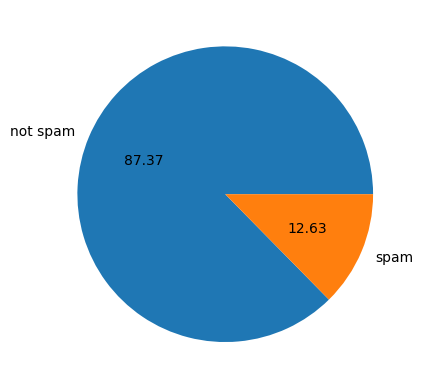

In [ ]:
plt.pie(df["msg_type"].value_counts(), labels = ["not spam", "spam"], autopct="%0.2f")

# **Number of Characters in Messages**

---



In [ ]:
df["num_charac"] = df["msg"].apply(len)
df.head()

,msg_type,msg,num_charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# **Tokenizing Message**

---



In [ ]:
from nltk.tokenize import word_tokenize

df["num_words"]     = df["msg"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_sentences"] = df["msg"].apply(lambda x: len(nltk.sent_tokenize(x)))

df.head()

,msg_type,msg,num_charac,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# **Describing Ham Message Type Data**

---



In [ ]:
df[df["msg_type"]==1].describe()

,msg_type,num_charac,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


# **Describing Spam Message Type Data**

---



In [ ]:
df[df["msg_type"]==0].describe()

,msg_type,num_charac,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


# **Historical Plot of Data**

---



<Axes: xlabel='num_charac', ylabel='Count'>

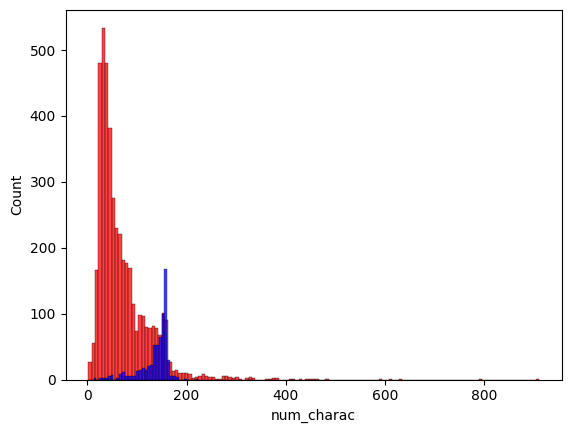

In [ ]:
sns.histplot(df[df["msg_type"]==0]['num_charac'], color = "red")
sns.histplot(df[df["msg_type"]==1]['num_charac'], color = "blue")

<Axes: xlabel='num_sentences', ylabel='Count'>

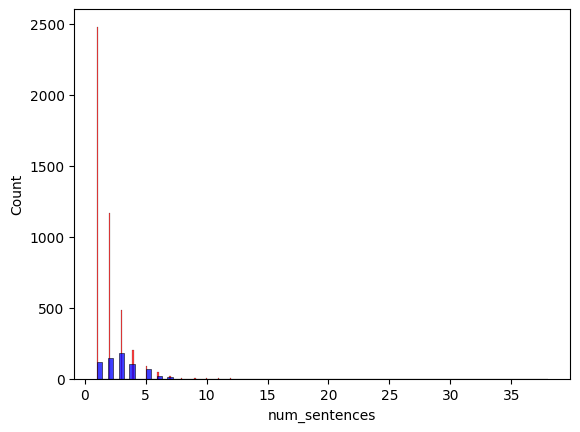

In [ ]:
sns.histplot(df[df["msg_type"] == 0]["num_sentences"], color = "red")
sns.histplot(df[df["msg_type"] == 1]["num_sentences"], color = "blue")

# **Correlation of Data**

---



<ipython-input-40-cc7cc258d046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


<Axes: >

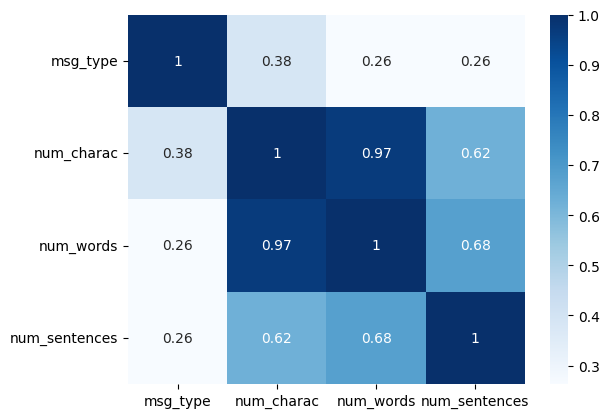

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# **Transforming Message**

---



## **Using Natural Language Tool Kit**

---



In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

## **Function Used to Transform Message**

---



In [ ]:
def text_transform(msg):

    msg = msg.lower()
    msg = nltk.word_tokenize(msg)

    y=[]
    for i in msg:

        if i.isalnum():
            y.append(i)

        y.clear()

    for i in msg:

        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    msg=y[:]
    y.clear()


    for i in msg:
        y.append(ps.stem(i))


    return " ".join(y)


In [ ]:
df["transformed_msg"] = df["msg"].apply(text_transform)

# **Building Model**

---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df["transformed_msg"]).toarray()
y = df["msg_type"].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_preds = mnb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

print("Accuracy score of Multinomial NB is      : ", accuracy_score(y_test, y_preds))
print("Confusion Matrix of Multinomial NB is    : ")
print(confusion_matrix(y_test, y_preds))
print("Precision score of the Multinomial NB is : ", precision_score(y_test, y_preds))


Accuracy score of Multinomial NB is      :  0.9748549323017408
Confusion Matrix of Multinomial NB is    : 
[[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is :  1.0


In [ ]:
import pickle

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb_model, open("mnb_model.pkl", "wb"))

# **Application Code**

---



In [ ]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
import sklearn
from nltk.stem.porter import PorterStemmer

#nltk.download("punkt")
#nltk.download("stopwords")

ps = PorterStemmer()

def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

#Path to vectorizer model
tfidf = pickle.load(open('/Users/nilaysaraf/Downloads/vectorizer.pkl','rb'))
#Path to message classification model
model = pickle.load(open('/Users/nilaysaraf/Downloads/mnb_model.pkl','rb'))

st.title("SMS Spam Classifier")
input_sms = st.text_area("Enter the message")

if st.button('Predict'):
    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")

    else:
        st.header("Not Spam")
